### import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

### Read data

In [2]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

### understanding data

In [3]:
print(df_2015.columns) 
print(df_2016.columns) 
print(df_2017.columns) 
print(df_2018.columns) 
print(df_2019.columns) 

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Fre

In [4]:
df_2015.info()
df_2016.info()
df_2017.info()
df_2018.info()
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### data preprocessing

In [5]:
df_2017 = df_2017.rename(columns={'Happiness.Rank':'Happiness Rank', 'Happiness.Score': 'Happiness Score', 'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
       'Health..Life.Expectancy.':'Health (Life Expectancy)', 'Trust..Government.Corruption.':'Trust (Government Corruption)', 'Dystopia.Residual':'Dystopia Residual'})

In [6]:
df_2018 = df_2018.rename(columns={'Overall rank': 'Happiness Rank', 'Score':'Happiness Score', 'GDP per capita':'Economy (GDP per Capita)','Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)',
       'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Trust (Government Corruption)'})

In [7]:
df_2019 = df_2019.rename(columns={'Overall rank': 'Happiness Rank', 'Score':'Happiness Score', 'GDP per capita':'Economy (GDP per Capita)','Social support':'Family', 'Healthy life expectancy':'Health (Life Expectancy)',
       'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Trust (Government Corruption)'})

In [8]:
df_2015.drop(["Standard Error", "Dystopia Residual"], axis = 1, inplace= True)
df_2016.drop(["Lower Confidence Interval", "Upper Confidence Interval", "Dystopia Residual"], axis = 1, inplace= True)
df_2017.drop(["Whisker.high", "Whisker.low","Dystopia Residual"], axis = 1, inplace= True)

In [9]:
print(df_2015.columns) 
print(df_2016.columns) 
print(df_2017.columns) 
print(df_2018.columns) 
print(df_2019.columns) 

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')
Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)'],
      dtype='object')
Index(['Happiness Rank', 'Country or region', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)'],
      dtype='object')
Index(['Happiness Rank', 'Country or region', 'Happiness Score',
       'Economy (GDP per Capita)', 'Famil

In [10]:
df_2015['Year'] = '2015'
df_2016['Year'] = '2016'
df = pd.concat([df_2015,df_2016])


In [11]:
## function to count countries and region and unknown values in the dataframe
def count(data,df):
    count1 = count2 = unknown = 0
    for name in data:
        if name.strip() in df['Country'].str.strip().values:
            count1 = count1 + 1
        elif name.strip() in df['Region'].str.strip().values:
            count2 = count2 + 1
        else:
            unknown = unknown + 1
    return count1,count2,unknown 

def print_unknown(data,df):
    unknown = []
    for name in data:
        if name.strip() not in df['Country'].str.strip().values:
            if name.strip() not in df['Region'].str.strip().values:
                unknown.append(name.strip())
    return unknown

def replace_old_2_new(unknown, data):
    for name in unknown:
        if name.strip() == 'Taiwan Province of China':
            data.replace(name, 'Taiwan', inplace=True)
        elif name.strip() == 'Hong Kong S.A.R., China':
            data.replace(name, 'Hong Kong', inplace=True)
        elif name.strip() == 'Trinidad & Tobago':
            data.replace(name, 'Trinidad and Tobago', inplace=True)
        elif name.strip() == 'Northern Cyprus':
            data.replace(name, 'North Cyprus', inplace=True)
        elif name.strip() == 'North Macedonia':
            data.replace(name, 'Macedonia', inplace=True)




#### checking for unknown values

In [12]:
## validating if column 'country or region' has countries or region 
x,y,z = count(df_2017['Country'],df)
unknown = print_unknown(df_2017['Country'],df)
print(x,y,z)
print(unknown)

153 0 2
['Taiwan Province of China', 'Hong Kong S.A.R., China']


In [13]:
## validating if column 'country or region' has countries or region 
country, region, unknown = count(df_2018['Country or region'],df)
unknown_2018 = print_unknown(df_2018['Country or region'],df)
print(country, region, unknown)
print(unknown_2018)

154 0 2
['Trinidad & Tobago', 'Northern Cyprus']


In [14]:
## validating if column 'country or region' has countries or region 
country, region, unknown = count(df_2019['Country or region'],df)
unknown_2019 = print_unknown(df_2019['Country or region'],df)
print(country, region, unknown)
print(unknown_2019)

152 0 4
['Trinidad & Tobago', 'Northern Cyprus', 'North Macedonia', 'Gambia']


In [15]:
df_2018 = df_2018.rename(columns={'Country or region': 'Country'})
df_2019 = df_2019.rename(columns={'Country or region': 'Country'})

In [16]:
df_2017['Year'] = '2017'
df_2018['Year'] = '2018'
df_2019['Year'] = '2019'

In [17]:
df2 = pd.concat([df_2017,df_2018,df_2019])

In [18]:
country_to_region = dict(zip(df['Country'], df['Region']))
df['Country'] = df['Country'].reset_index(drop=True)  # Reset index to remove duplicate labels
df_2017['Region'] = df_2017['Country'].map(country_to_region)
df_2018['Region'] = df_2018['Country'].map(country_to_region)
df_2019['Region'] = df_2019['Country'].map(country_to_region)

In [19]:
#country_to_region

In [20]:
df2 = pd.concat([df_2017,df_2018,df_2019])

In [21]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

In [22]:
df2.isna().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    1
Year                             0
Region                           8
dtype: int64

#### handling NULL values

In [23]:
df2[df2['Region'].isna()]

Country  Happiness Rank  Happiness Score  \
32   Taiwan Province of China              33            6.422   
70    Hong Kong S.A.R., China              71            5.472   
37          Trinidad & Tobago              38            6.192   
57            Northern Cyprus              58            5.835   
38          Trinidad & Tobago              39            6.192   
63            Northern Cyprus              64            5.718   
83            North Macedonia              84            5.274   
119                    Gambia             120            4.516   

     Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
32                   1.433627  1.384565                  0.793984  0.361467   
70                   1.551675  1.262791                  0.943062  0.490969   
37                   1.223000  1.492000                  0.564000  0.575000   
57                   1.229000  1.211000                  0.909000  0.495000   
38                   1.231000  1.477000                  0.713000  0.489000   
63                   1.263000  1.252000                  1.042000  0.417000   
83                   0.983000  1.294000                  0.838000  0.345000   
119                  0.308000  0.939000                  0.428000  0.382000   

     Generosity  Trust (Government Corruption)  Year Region  
32     0.258360                       0.063829  2017    NaN  
70     0.374466                       0.293934  2017    NaN  
37     0.171000                       0.019000  2018    NaN  
57     0.179000                       0.154000  2018    NaN  
38     0.185000                       0.016000  2019    NaN  
63     0.191000                       0.162000  2019    NaN  
83     0.185000                       0.034000  2019    NaN  
119    0.269000                       0.167000  2019    NaN

In [24]:
unknown = print_unknown(df2['Country'],df)
replace_old_2_new(unknown,df2['Country'])

In [25]:
df2['Region'] = df2['Country'].map(country_to_region)

In [26]:
df2.isna().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    1
Year                             0
Region                           1
dtype: int64

In [27]:
df2[df2['Region'].isna()]

Country  Happiness Rank  Happiness Score  Economy (GDP per Capita)  \
119  Gambia             120            4.516                     0.308   

     Family  Health (Life Expectancy)  Freedom  Generosity  \
119   0.939                     0.428    0.382       0.269   

     Trust (Government Corruption)  Year Region  
119                          0.167  2019    NaN

In [28]:
df2[df2['Trust (Government Corruption)'].isna()]

Country  Happiness Rank  Happiness Score  \
19  United Arab Emirates              20            6.774   

    Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
19                     2.096   0.776                      0.67    0.284   

    Generosity  Trust (Government Corruption)  Year  \
19       0.186                            NaN  2018   

                             Region  
19  Middle East and Northern Africa

In [29]:
df2.dropna(inplace = True)

#### final cleaned dataset

In [30]:
df = pd.concat([df,df2])

In [31]:
df

Country              Region  Happiness Rank  \
0                 Switzerland      Western Europe               1   
1                     Iceland      Western Europe               2   
2                     Denmark      Western Europe               3   
3                      Norway      Western Europe               4   
4                      Canada       North America               5   
..                        ...                 ...             ...   
151                    Rwanda  Sub-Saharan Africa             152   
152                  Tanzania  Sub-Saharan Africa             153   
153               Afghanistan       Southern Asia             154   
154  Central African Republic  Sub-Saharan Africa             155   
155               South Sudan  Sub-Saharan Africa             156   

     Happiness Score  Economy (GDP per Capita)   Family  \
0              7.587                   1.39651  1.34951   
1              7.561                   1.30232  1.40223   
2              7.527                   1.32548  1.36058   
3              7.522                   1.45900  1.33095   
4              7.427                   1.32629  1.32261   
..               ...                       ...      ...   
151            3.334                   0.35900  0.71100   
152            3.231                   0.47600  0.88500   
153            3.203                   0.35000  0.51700   
154            3.083                   0.02600  0.00000   
155            2.853                   0.30600  0.57500   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
151                   0.61400  0.55500                        0.41100   
152                   0.49900  0.41700                        0.14700   
153                   0.36100  0.00000                        0.02500   
154                   0.10500  0.22500                        0.03500   
155                   0.29500  0.01000                        0.09100   

     Generosity  Year  
0       0.29678  2015  
1       0.43630  2015  
2       0.34139  2015  
3       0.34699  2015  
4       0.45811  2015  
..          ...   ...  
151     0.21700  2019  
152     0.27600  2019  
153     0.15800  2019  
154     0.23500  2019  
155     0.20200  2019  

[780 rows x 11 columns]

In [32]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

### Data Analysis and Visualization

#### Distribution of happiness score

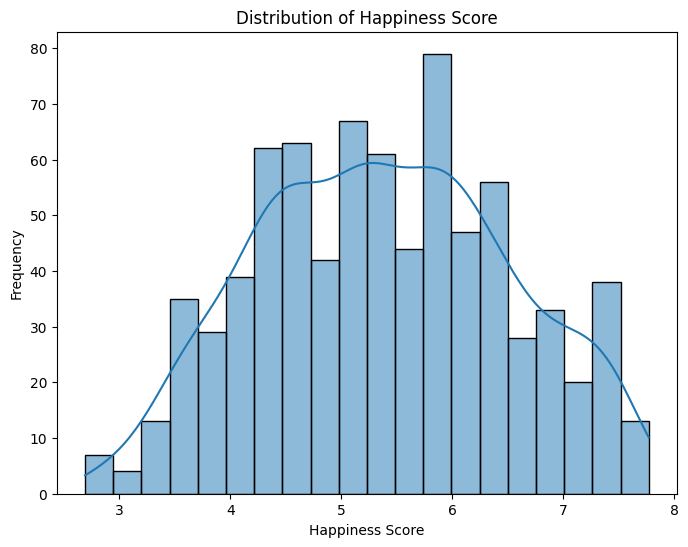

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Happiness Score'], bins=20, kde=True)
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


#### Factors Influencing Happiness and their correlation

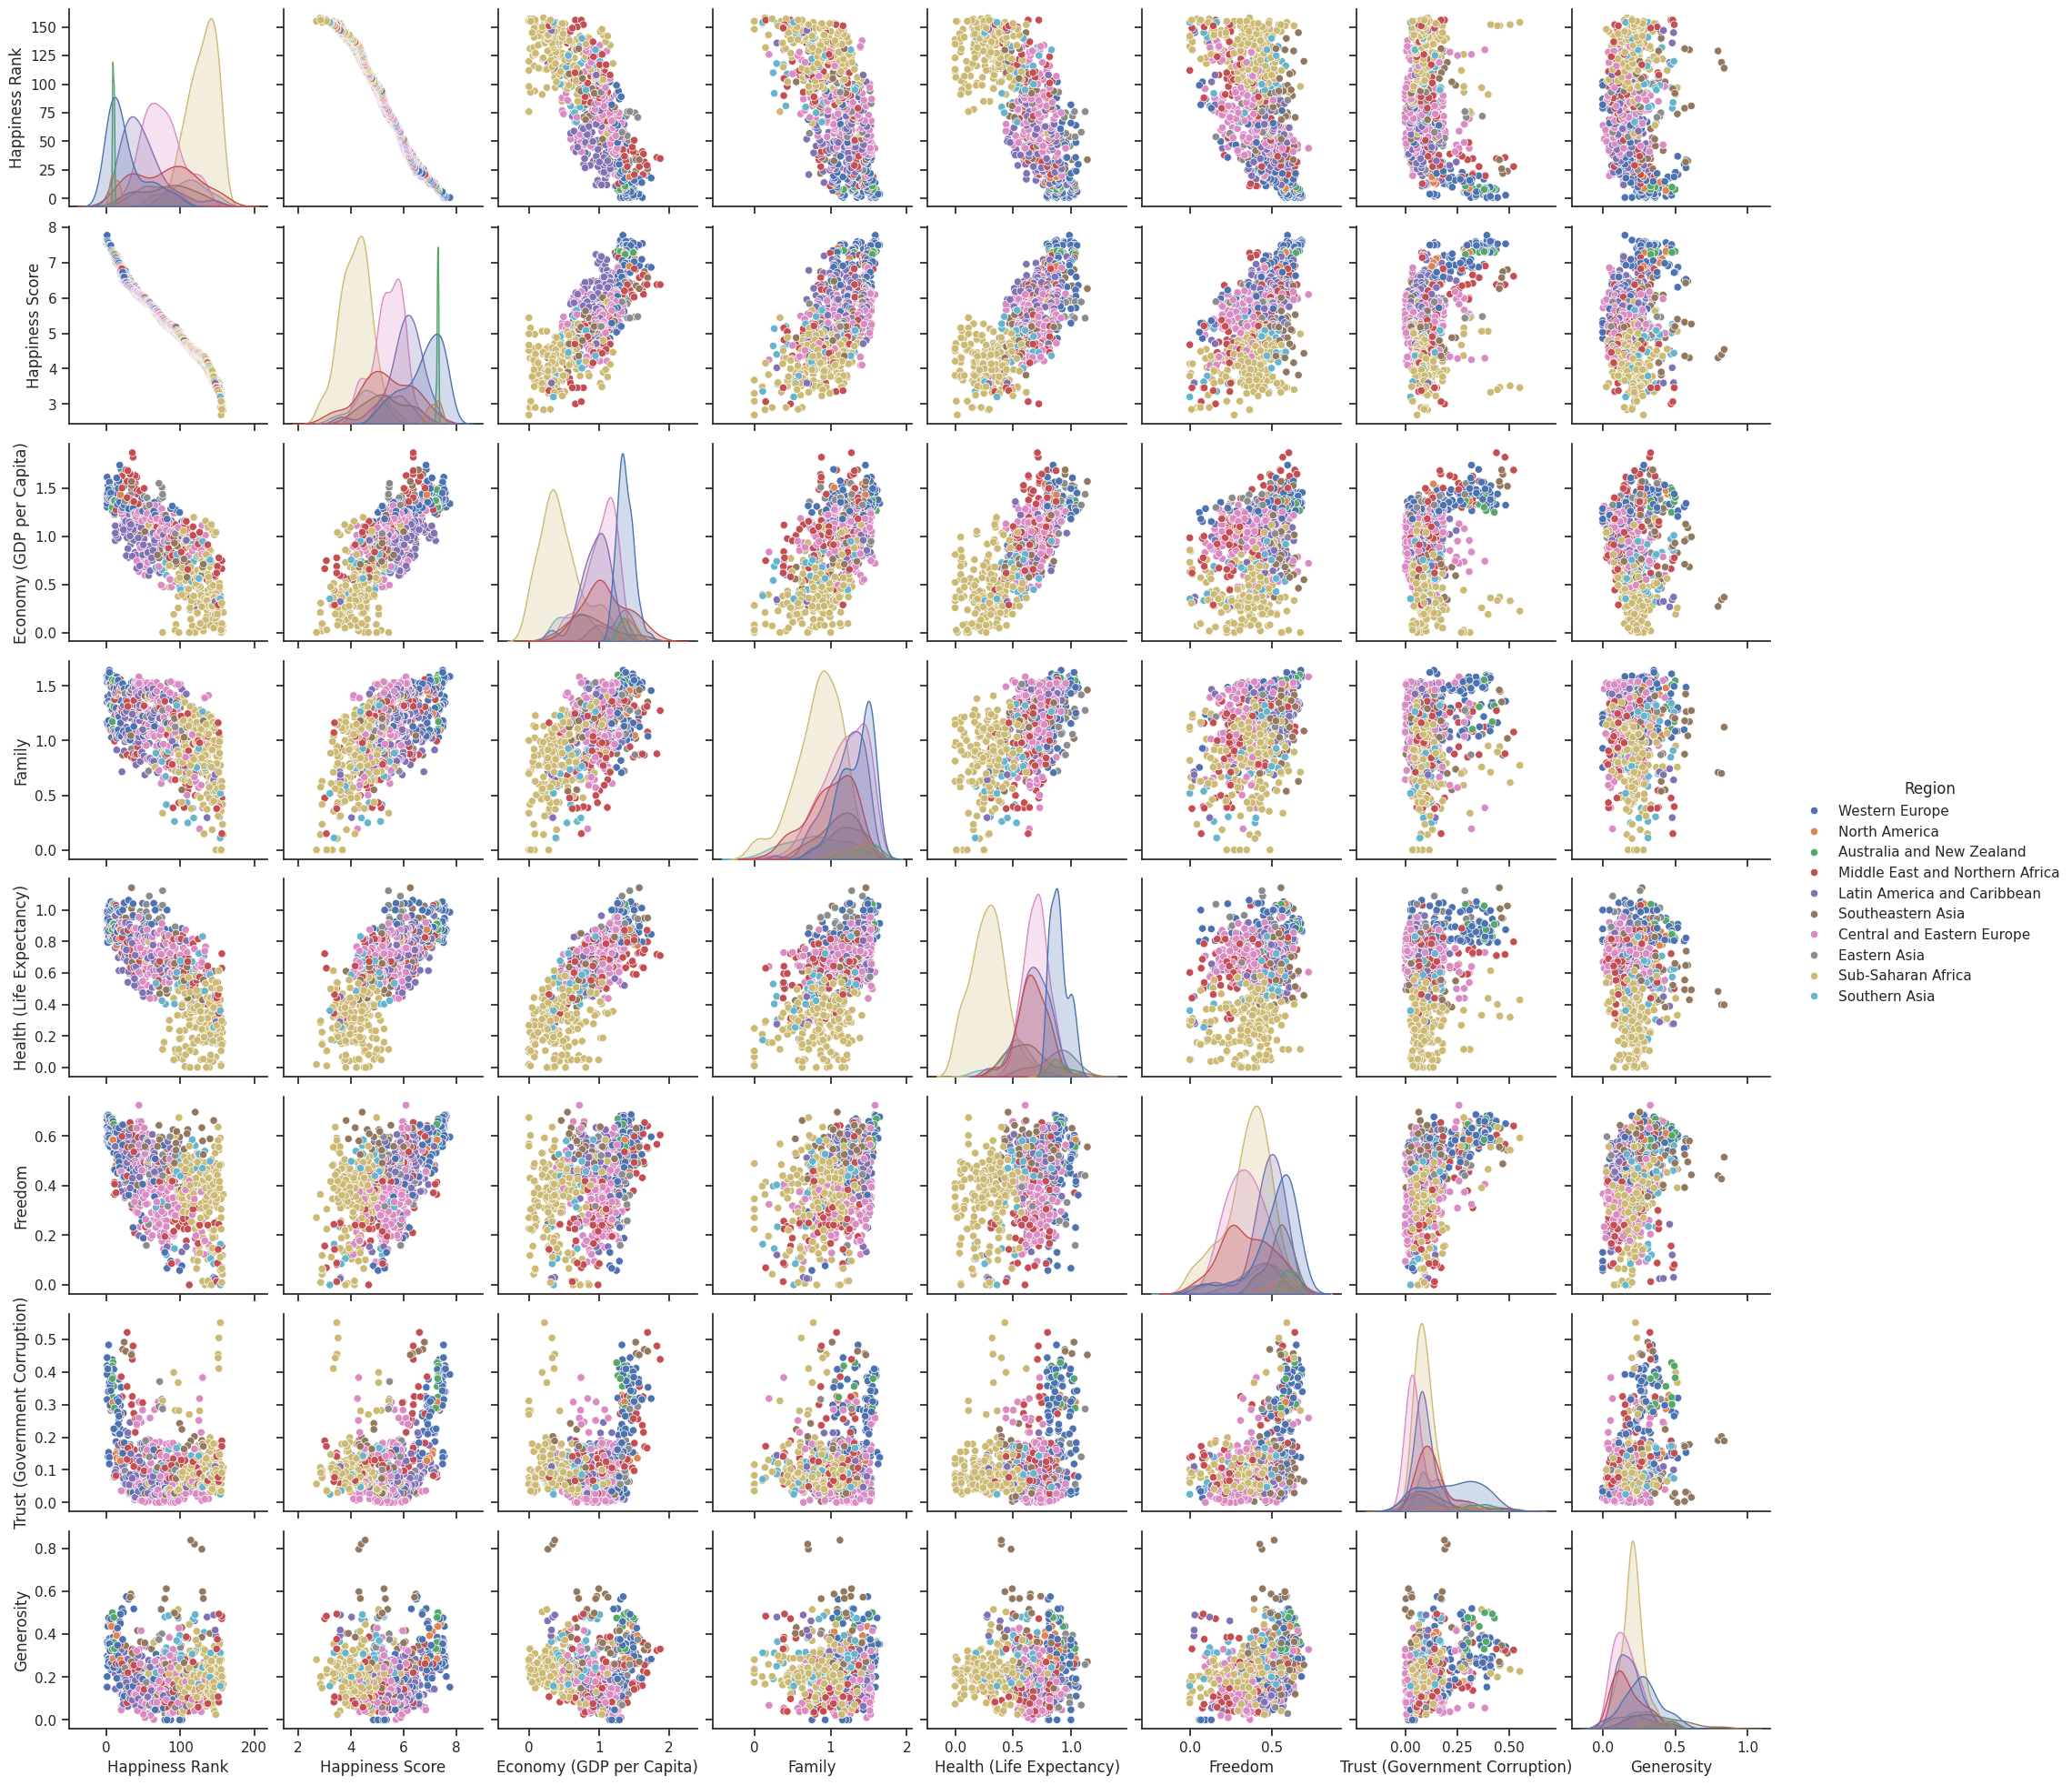

In [34]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="Region")

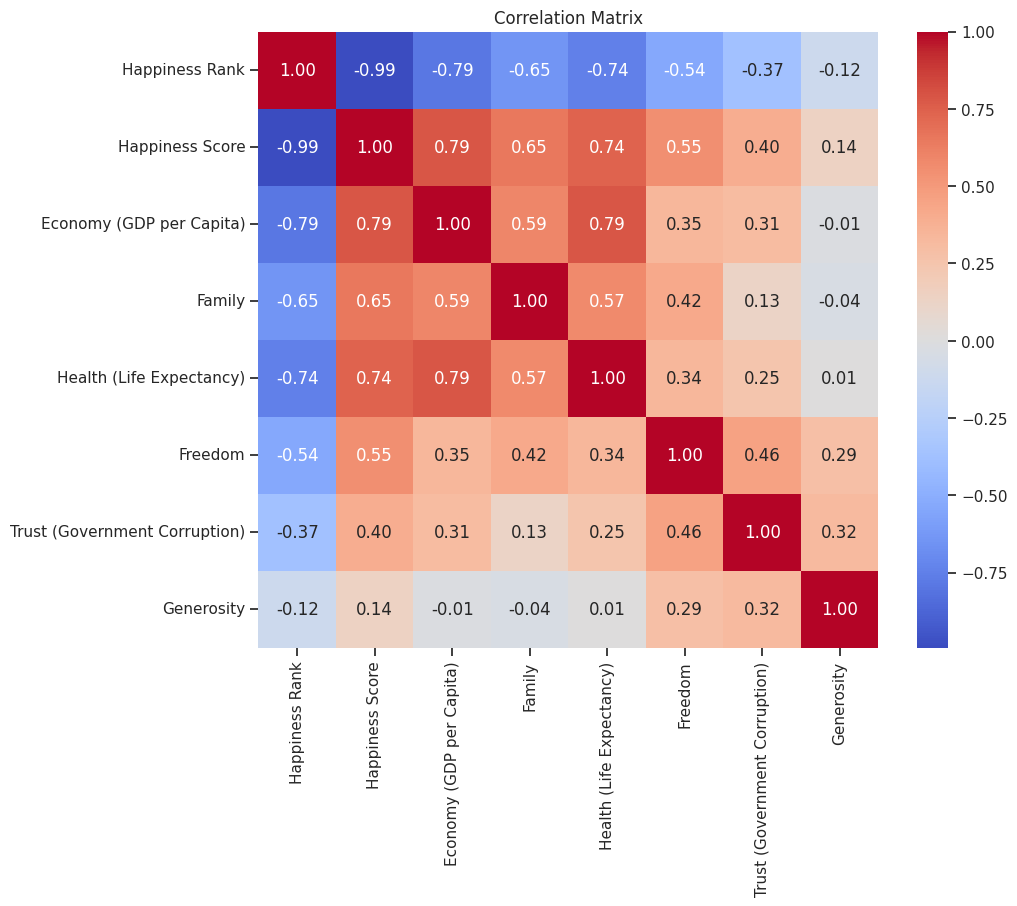

In [35]:
# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


#### Statistical analysis

In [36]:
df.groupby(["Year","Region"])["Happiness Score"].agg(["max","min","mean","size"])

max    min      mean  size
Year Region                                                       
2015 Australia and New Zealand        7.286  7.284  7.285000     2
     Central and Eastern Europe       6.505  4.218  5.332931    29
     Eastern Asia                     6.298  4.874  5.626167     6
     Latin America and Caribbean      7.226  4.518  6.144682    22
     Middle East and Northern Africa  7.278  3.006  5.406900    20
     North America                    7.427  7.119  7.273000     2
     Southeastern Asia                6.798  3.819  5.317444     9
     Southern Asia                    5.253  3.575  4.580857     7
     Sub-Saharan Africa               5.477  2.839  4.202800    40
     Western Europe                   7.587  4.857  6.689619    21
2016 Australia and New Zealand        7.334  7.313  7.323500     2
     Central and Eastern Europe       6.596  4.217  5.370690    29
     Eastern Asia                     6.379  4.907  5.624167     6
     Latin America and Caribbean      7.087  4.028  6.101750    24
     Middle East and Northern Africa  7.267  3.069  5.386053    19
     North America                    7.404  7.104  7.254000     2
     Southeastern Asia                6.739  3.907  5.338889     9
     Southern Asia                    5.196  3.360  4.563286     7
     Sub-Saharan Africa               5.648  2.905  4.136421    38
     Western Europe                   7.526  5.033  6.685667    21
2017 Australia and New Zealand        7.314  7.284  7.299000     2
     Central and Eastern Europe       6.609  4.096  5.409931    29
     Eastern Asia                     6.422  4.955  5.646667     6
     Latin America and Caribbean      7.079  3.603  5.957818    22
     Middle East and Northern Africa  7.213  3.462  5.369684    19
     North America                    7.316  6.993  7.154500     2
     Southeastern Asia                6.572  4.168  5.444875     8
     Southern Asia                    5.269  3.794  4.628429     7
     Sub-Saharan Africa               5.629  2.693  4.111949    39
     Western Europe                   7.537  5.195  6.703714    21
2018 Australia and New Zealand        7.324  7.272  7.298000     2
     Central and Eastern Europe       6.711  4.103  5.463966    29
     Eastern Asia                     6.441  5.125  5.672000     6
     Latin America and Caribbean      7.072  3.582  5.950136    22
     Middle East and Northern Africa  6.814  3.355  5.199889    18
     North America                    7.328  6.886  7.107000     2
     Southeastern Asia                6.343  4.308  5.313444     9
     Southern Asia                    5.472  3.632  4.603857     7
     Sub-Saharan Africa               5.891  2.905  4.195026    39
     Western Europe                   7.632  5.358  6.781762    21
2019 Australia and New Zealand        7.307  7.228  7.267500     2
     Central and Eastern Europe       6.852  4.332  5.561517    29
     Eastern Asia                     6.446  5.191  5.688833     6
     Latin America and Caribbean      7.167  3.597  5.954429    21
     Middle East and Northern Africa  7.139  3.380  5.237000    19
     North America                    7.278  6.892  7.085000     2
     Southeastern Asia                6.262  4.360  5.273667     9
     Southern Asia                    5.653  3.203  4.526857     7
     Sub-Saharan Africa               5.888  2.853  4.294513    39
     Western Europe                   7.769  5.287  6.842190    21

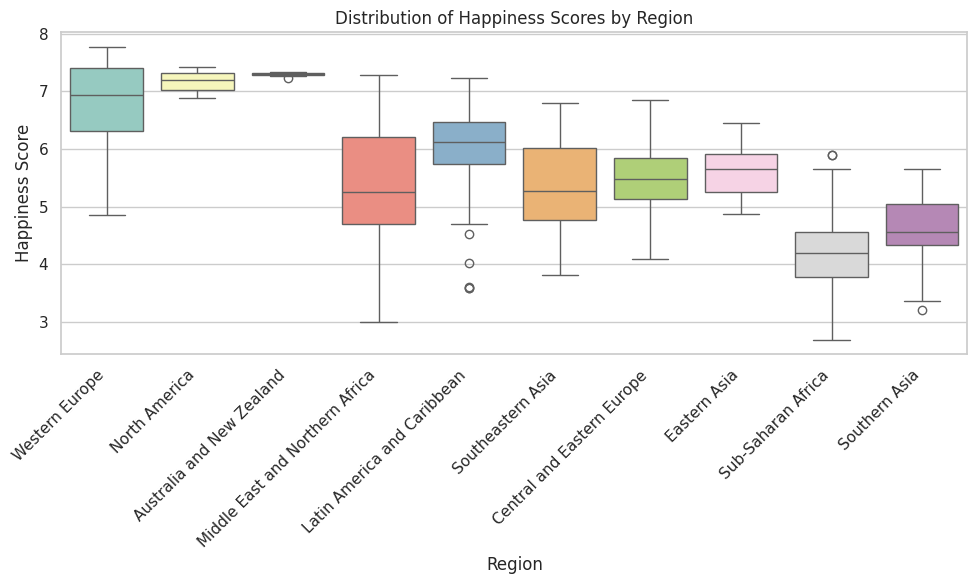

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Happiness Score', hue='Region', palette='Set3', dodge=False)
plt.title('Distribution of Happiness Scores by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()



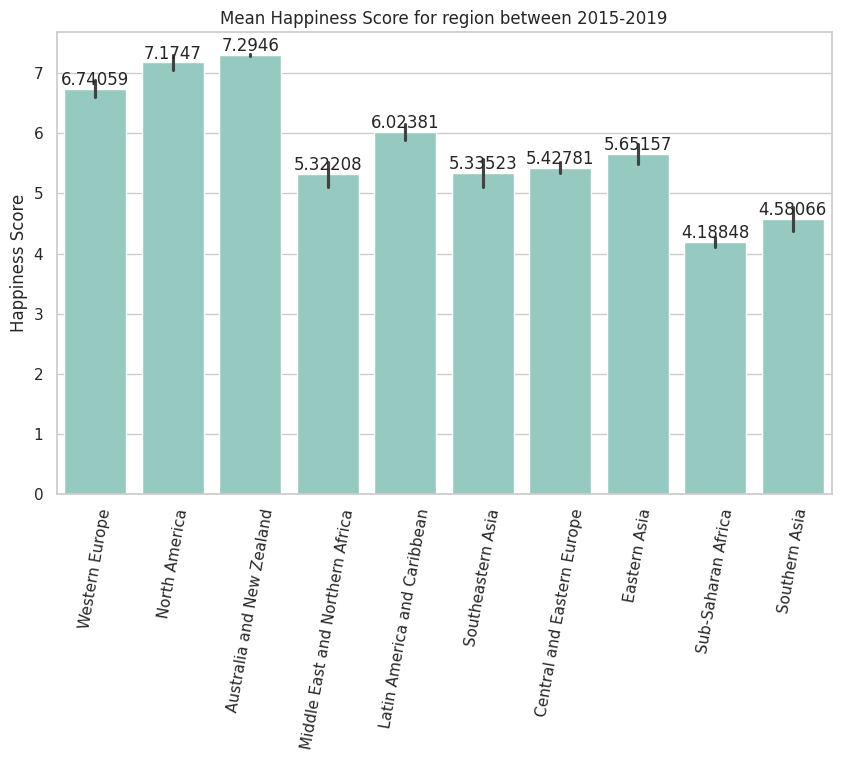

In [38]:
sns.set_palette("Set3")              
plt.figure(figsize=(10,6))
ax = sns.barplot(data = df.reset_index(), x="Region", y="Happiness Score")
plt.xticks(rotation=80)
plt.title("Mean Happiness Score for region between 2015-2019")
plt.ylabel("Happiness Score")

# Add column values
ax.set(xlabel=None)
for i in ax.containers:
    ax.bar_label(i,)

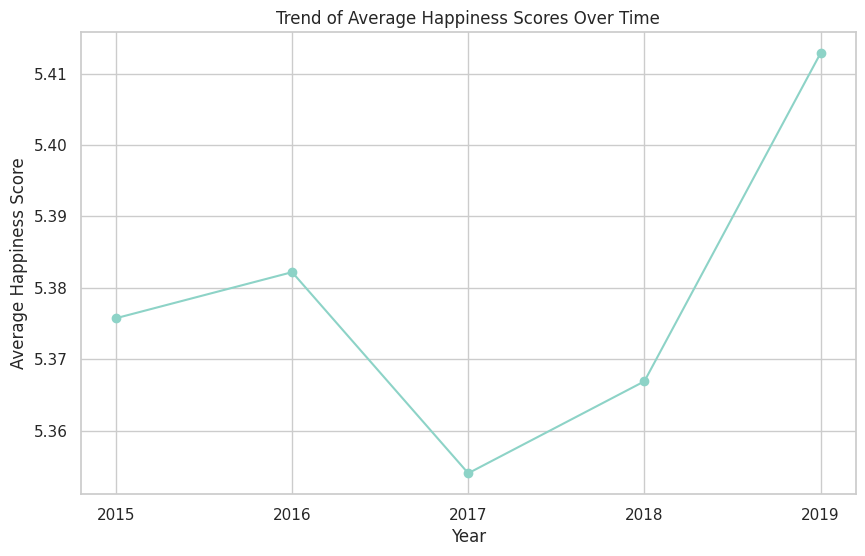

In [39]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Aggregate data to calculate average happiness scores for each year
average_scores_per_year = df.groupby('Year')['Happiness Score'].mean()

# Plotting the trend of average happiness scores over time
plt.figure(figsize=(10, 6))
plt.plot(average_scores_per_year.index, average_scores_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.title('Trend of Average Happiness Scores Over Time')
plt.grid(True)
plt.xticks(average_scores_per_year.index)
plt.show()


In [40]:
df_hs = pd.DataFrame(df.groupby(["Year","Region"])["Happiness Score"].mean())
df_hs= df_hs.reset_index().pivot(index = "Region", columns="Year")
df_pivot = pd.DataFrame(df_hs.droplevel(0, axis=1))

In [41]:
df_pivot

Year                                 2015      2016      2017      2018  \
Region                                                                    
Australia and New Zealand        7.285000  7.323500  7.299000  7.298000   
Central and Eastern Europe       5.332931  5.370690  5.409931  5.463966   
Eastern Asia                     5.626167  5.624167  5.646667  5.672000   
Latin America and Caribbean      6.144682  6.101750  5.957818  5.950136   
Middle East and Northern Africa  5.406900  5.386053  5.369684  5.199889   
North America                    7.273000  7.254000  7.154500  7.107000   
Southeastern Asia                5.317444  5.338889  5.444875  5.313444   
Southern Asia                    4.580857  4.563286  4.628429  4.603857   
Sub-Saharan Africa               4.202800  4.136421  4.111949  4.195026   
Western Europe                   6.689619  6.685667  6.703714  6.781762   

Year                                 2019  
Region                                     
Australia and New Zealand        7.267500  
Central and Eastern Europe       5.561517  
Eastern Asia                     5.688833  
Latin America and Caribbean      5.954429  
Middle East and Northern Africa  5.237000  
North America                    7.085000  
Southeastern Asia                5.273667  
Southern Asia                    4.526857  
Sub-Saharan Africa               4.294513  
Western Europe                   6.842190

In [42]:
#pd.DataFrame(df.groupby(["Year","Region"])["Happiness Score"].mean()).reset_index().pivot(index = 'Year', columns = 'Region')

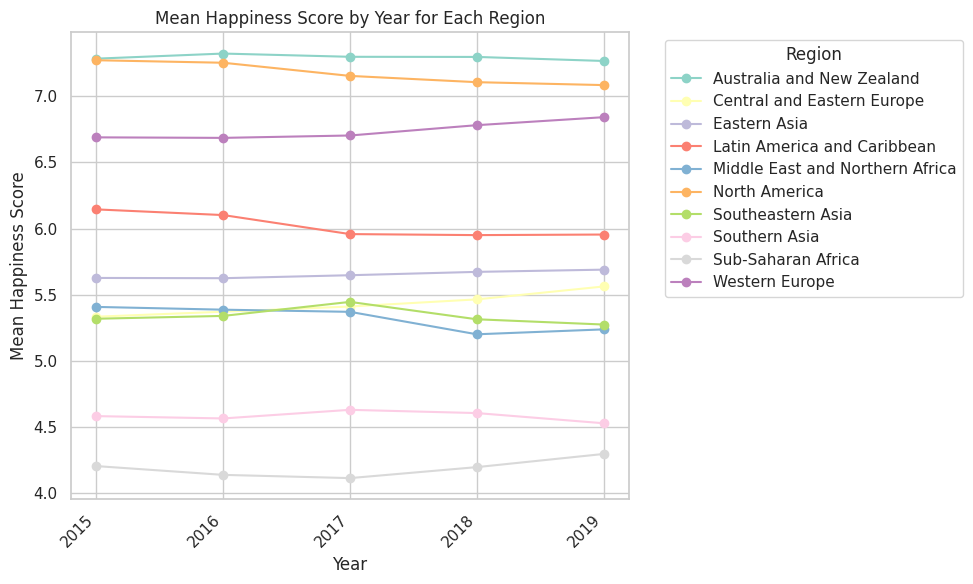

In [43]:
# Plotting
plt.figure(figsize=(10, 6))
for region in df_pivot.index:
    plt.plot(df_pivot.columns, df_pivot.loc[region], label=region, marker='o')

plt.title('Mean Happiness Score by Year for Each Region')
plt.xlabel('Year')
plt.ylabel('Mean Happiness Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### top 10 happiest and most sad countries and the relation between variables that affect it

In [44]:
x = df['Happiness Rank'] == 1

In [45]:
df.loc[x][['Country','Happiness Rank','Happiness Score','Year']]

Country  Happiness Rank  Happiness Score  Year
0  Switzerland               1            7.587  2015
0  Switzerland               1            7.526  2016
0       Norway               1            7.537  2017
0      Finland               1            7.632  2018
0      Finland               1            7.769  2019

In [46]:
#top 10 happiest countries for each year
top_10_happiest = df.groupby('Year').apply(lambda x: x.nlargest(10, 'Happiness Score'))
top_10_happiest.reset_index(drop=True, inplace=True)

In [47]:
top_10_happiest['Year'] = top_10_happiest['Year'].astype(int)
anomalies = []
for year in top_10_happiest['Year'].unique():
    if year > top_10_happiest['Year'].min():
        previous_year_data = top_10_happiest[top_10_happiest['Year'] == year - 1]
        current_year_data = top_10_happiest[top_10_happiest['Year'] == year]
        
        previous_year_countries = set(previous_year_data['Country'])
        current_year_countries = set(current_year_data['Country'])
        
        new_countries_in_top_10 = current_year_countries - previous_year_countries
        if new_countries_in_top_10:
            anomalies.append((year, new_countries_in_top_10))

if anomalies:
    print("Anomalies found:")
    for anomaly in anomalies:
        print(f"In year {anomaly[0]}, the following countries became part of the top 10 happiest countries: {', '.join(anomaly[1])}")
else:
    print("No anomalies found.")


Anomalies found:
In year 2019, the following countries became part of the top 10 happiest countries: Austria


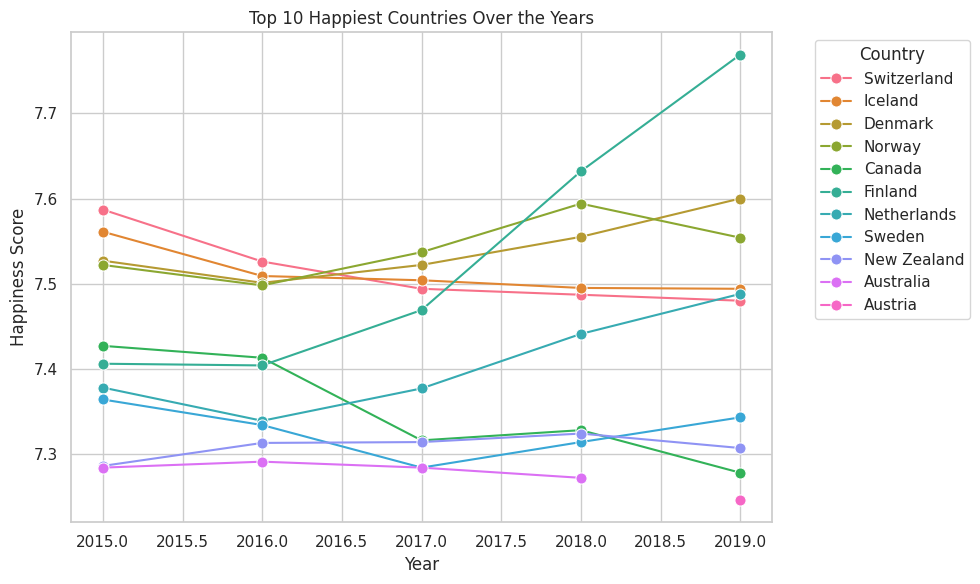

In [48]:
# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_10_happiest, x='Year', y='Happiness Score', hue='Country', marker='o', markersize=8)
plt.title('Top 10 Happiest Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


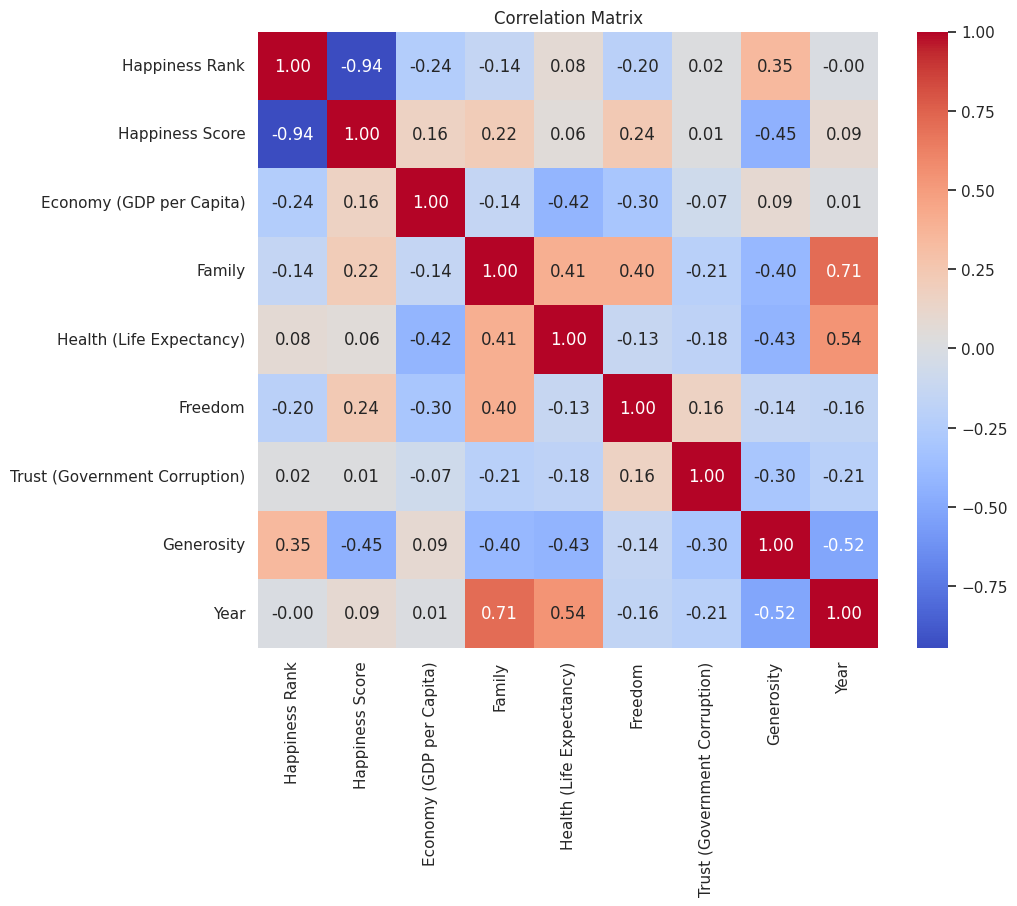

In [49]:
numeric_df = top_10_happiest.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [50]:
#top 10 most sad countries for each year
top_10_mostsad = df.groupby('Year').apply(lambda x: x.nsmallest(10, 'Happiness Score'))
top_10_mostsad.reset_index(drop=True, inplace=True)

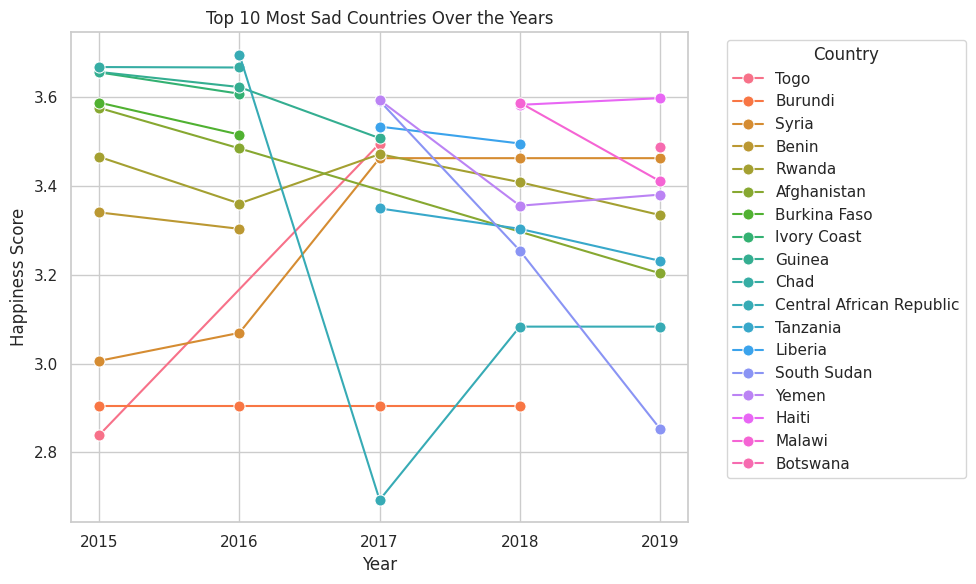

In [51]:
# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_10_mostsad, x='Year', y='Happiness Score', hue='Country', marker='o', markersize=8)
plt.title('Top 10 Most Sad Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


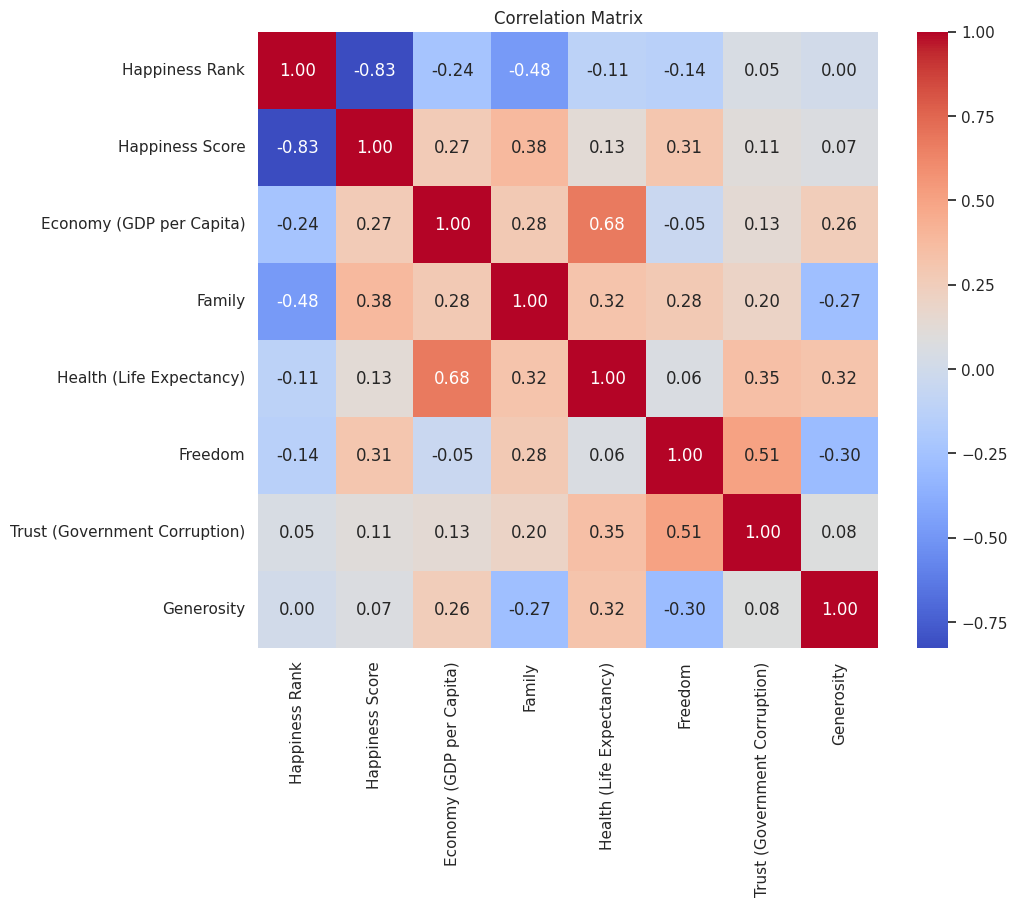

In [52]:
numeric_df = top_10_mostsad.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### happiness score in diferent geographic locations (countries)

/tmp/ipykernel_16404/141772332.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


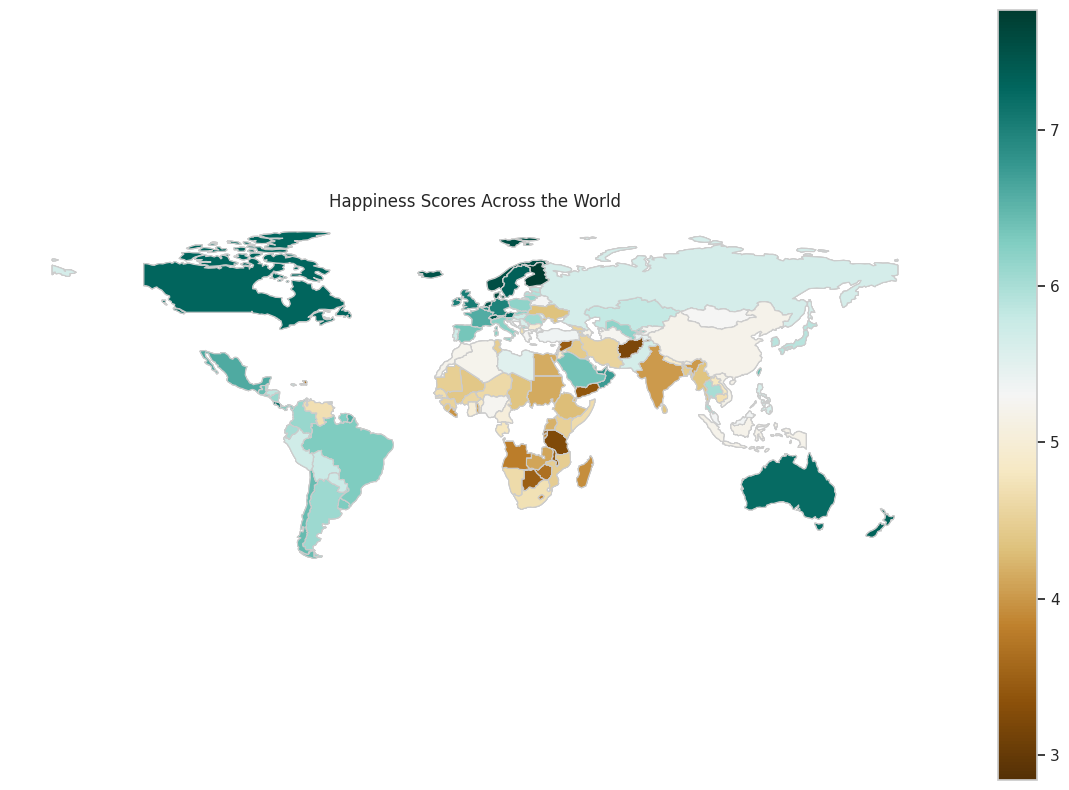

In [53]:
# Read a world shapefile for mapping
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(df, how='left', left_on='name', right_on='Country')

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Happiness Score', cmap='BrBG', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

#world = world.dropna()
# Annotate each country with its name
# for x, y, label in zip(world.geometry.centroid.x, world.geometry.centroid.y, world['Country']):
#     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

ax.axis('off')
ax.set_title('Happiness Scores Across the World')
plt.show()


#### Impact of Economy and Health on Happiness

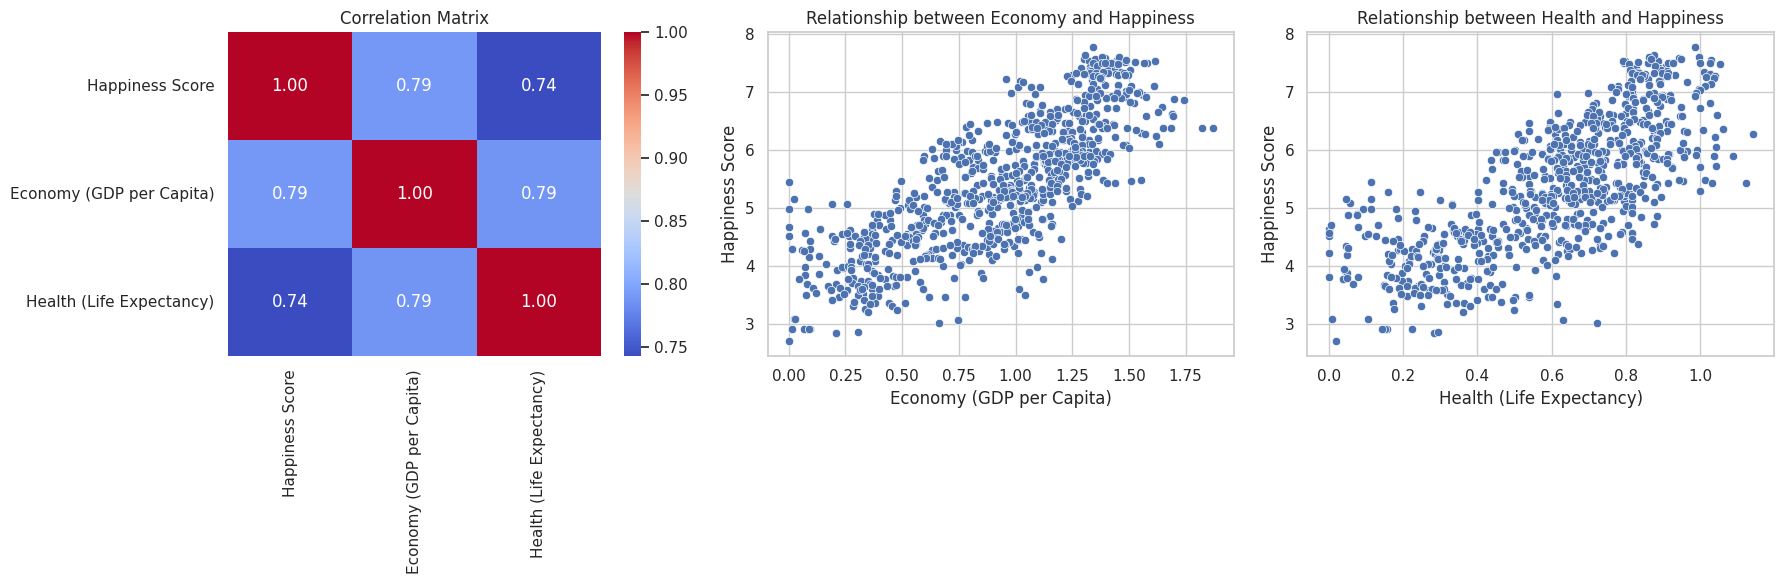

In [54]:
# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Correlation analysis
correlation_matrix = df[['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)']].corr()

# Plot correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Matrix')

# Visualize the relationship between Economy and Happiness
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=df, ax=axes[1])
axes[1].set_title('Relationship between Economy and Happiness')
axes[1].set_xlabel('Economy (GDP per Capita)')
axes[1].set_ylabel('Happiness Score')

# Visualize the relationship between Health and Happiness
sns.scatterplot(x='Health (Life Expectancy)', y='Happiness Score', data=df, ax=axes[2])
axes[2].set_title('Relationship between Health and Happiness')
axes[2].set_xlabel('Health (Life Expectancy)')
axes[2].set_ylabel('Happiness Score')


plt.tight_layout()
plt.show()


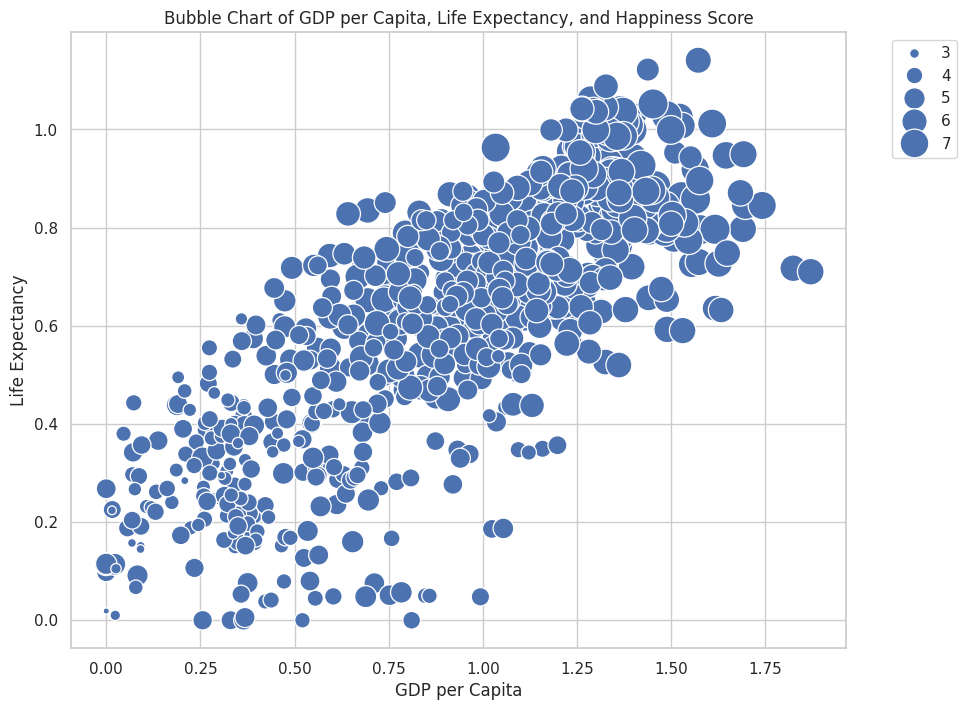

In [55]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Economy (GDP per Capita)', y='Health (Life Expectancy)', size='Happiness Score', data=df, sizes=(20, 500))
plt.title('Bubble Chart of GDP per Capita, Life Expectancy, and Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.legend(bbox_to_anchor=(1.05,1),loc = 'upper left')
plt.show()
